In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./global-data-on-sustainable-energy.csv")

In [3]:
df['Year'] = pd.to_datetime(df['Year'], format="%Y")
df['Year'] = df['Year'].dt.year

In [4]:
ls = df.columns
for index,col in enumerate(ls):
    print(index,col)

0 Entity
1 Year
2 Access to electricity (% of population)
3 Access to clean fuels for cooking
4 Renewable-electricity-generating-capacity-per-capita
5 Financial flows to developing countries (US $)
6 Renewable energy share in the total final energy consumption (%)
7 Electricity from fossil fuels (TWh)
8 Electricity from nuclear (TWh)
9 Electricity from renewables (TWh)
10 Low-carbon electricity (% electricity)
11 Primary energy consumption per capita (kWh/person)
12 Energy intensity level of primary energy (MJ/$2017 PPP GDP)
13 Value_co2_emissions_kt_by_country
14 Renewables (% equivalent primary energy)
15 gdp_growth
16 gdp_per_capita
17 Density\n(P/Km2)
18 Land Area(Km2)
19 Latitude
20 Longitude


In [5]:
df = df.drop(df.columns[14:],axis=1).drop(df.columns[5],axis=1)

In [6]:
for index,col in enumerate(df.columns):
    print(index,col)

0 Entity
1 Year
2 Access to electricity (% of population)
3 Access to clean fuels for cooking
4 Renewable-electricity-generating-capacity-per-capita
5 Renewable energy share in the total final energy consumption (%)
6 Electricity from fossil fuels (TWh)
7 Electricity from nuclear (TWh)
8 Electricity from renewables (TWh)
9 Low-carbon electricity (% electricity)
10 Primary energy consumption per capita (kWh/person)
11 Energy intensity level of primary energy (MJ/$2017 PPP GDP)
12 Value_co2_emissions_kt_by_country


Graphs:
- Year vs Acess to Electricity
- Year vs col 4
- year vs col 6,7,8
- Year vs col 5
- Low Carbon Electricity vs Value co2 emissions

In [7]:
df = df.fillna(0)

In [8]:
entities = df.iloc[:,0].unique()

In [213]:
for entity in entities:
    df_entity = df[df.iloc[:,0] == entity]
    plt.figure(figsize=(20,8))
    sns.lineplot(data=df_entity,y='Low-carbon electricity (% electricity)',x="Year", label="Low-Carbon Electrcity")
    sns.lineplot(data=df_entity,y='Access to electricity (% of population)',x="Year", label="Access to Electricity")
    sns.lineplot(data=df_entity,y='Renewable energy share in the total final energy consumption (%)',x="Year", label="Renewable Energy Share in Total Energy Consumption")
    plt.title(f"{entity}")
    plt.xlabel("Year")
    plt.ylabel("Percentage")
    plt.legend()
    # plt.show()
    plt.savefig(f"./graphs/lineplots/{entity}.jpeg")
    plt.close()

In [214]:
df_long = pd.melt(frame=df,
                  id_vars=['Year'],
                  value_vars=['Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)'],
                  var_name='Source',
                  value_name='Electricity'
                  )

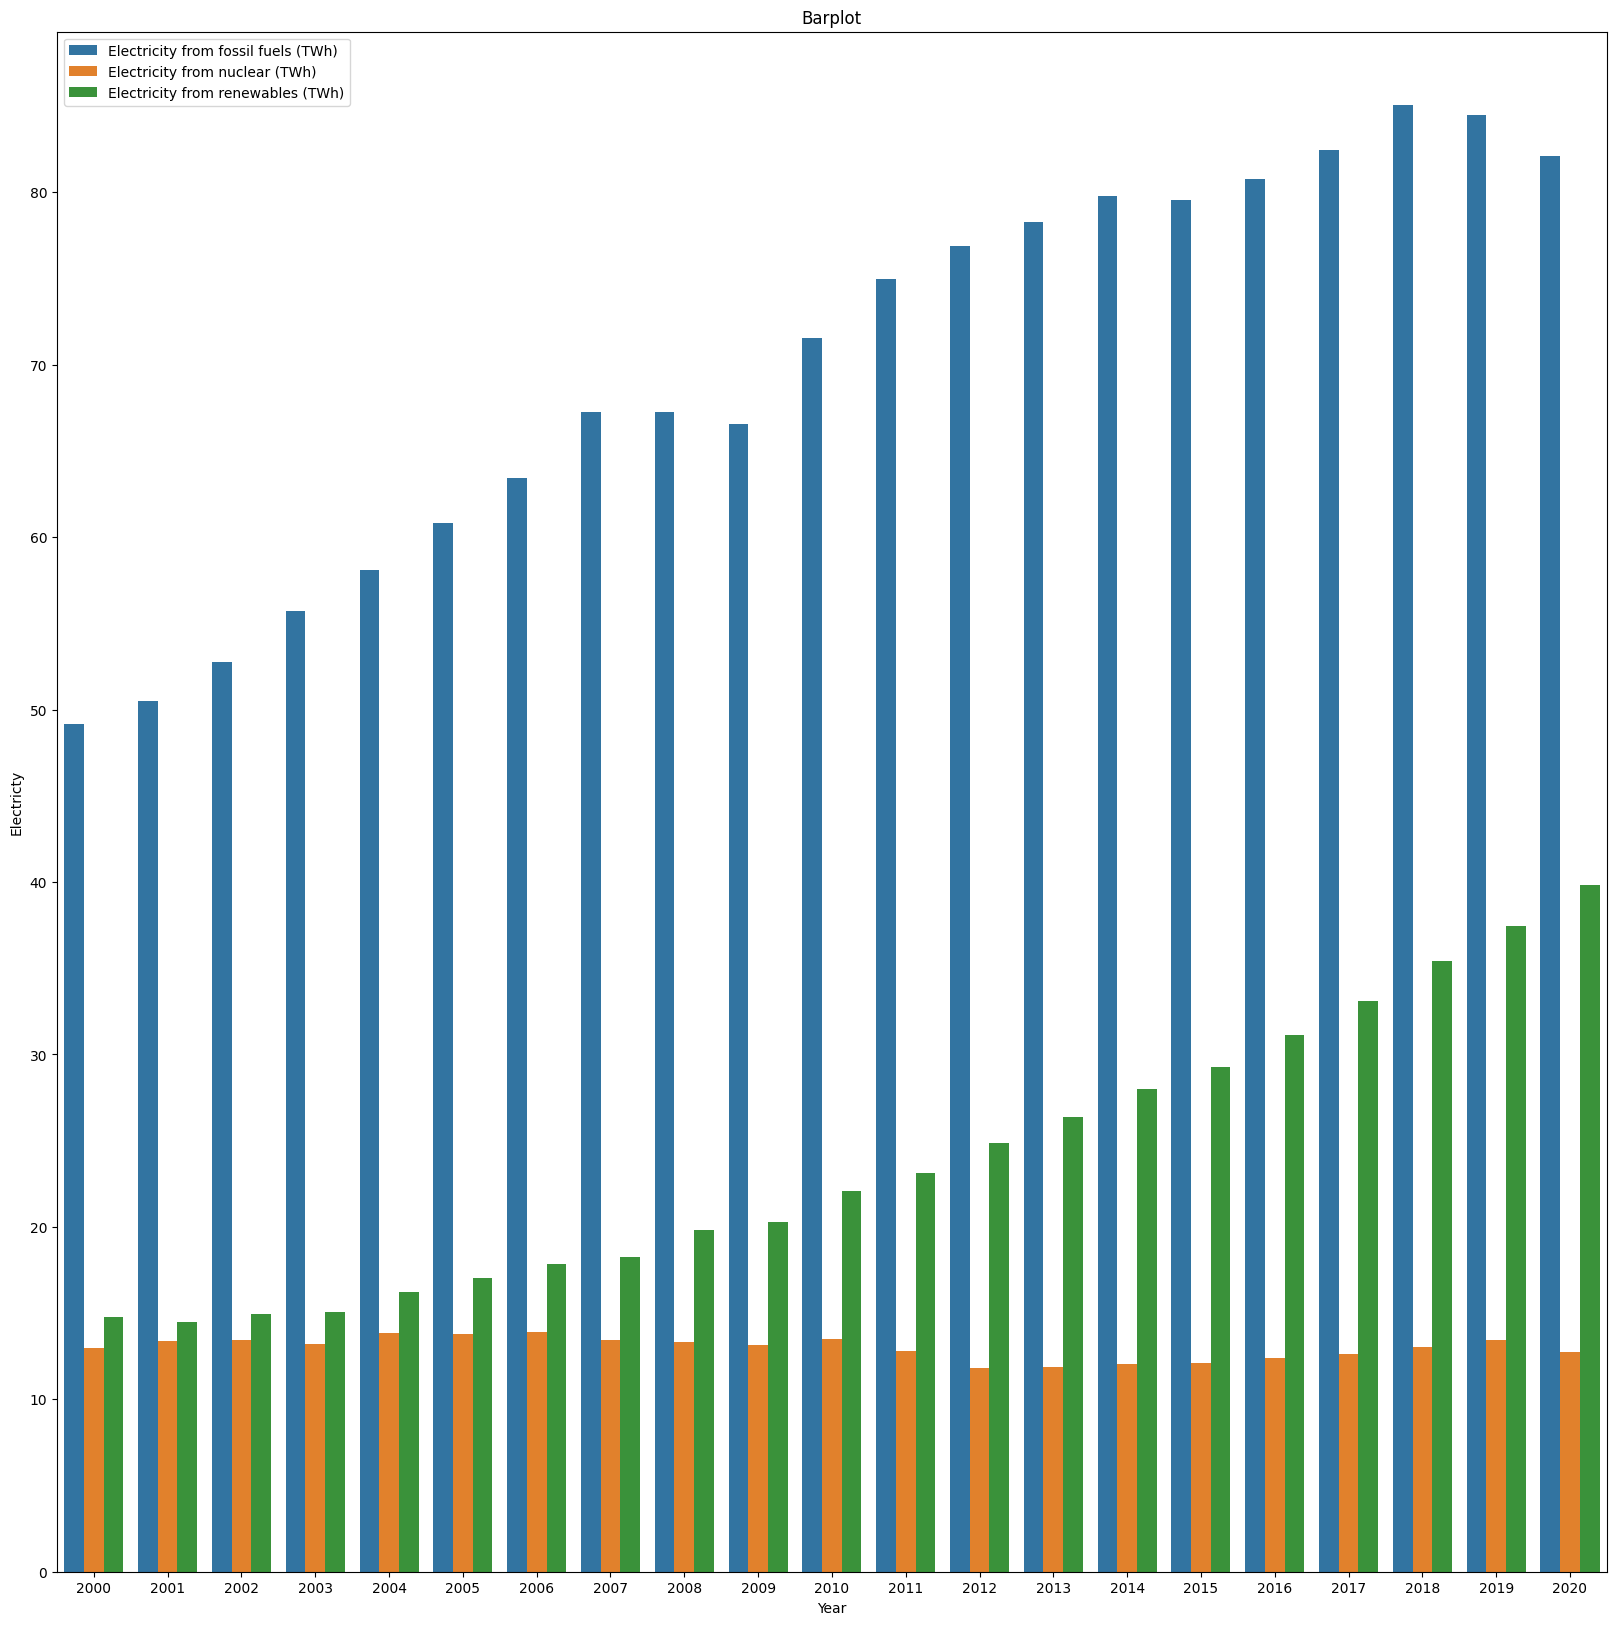

In [216]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_long,x='Year',y='Electricity',hue='Source',errorbar=None)
plt.title("Barplot")
plt.xlabel("Year") 
plt.ylabel("Electricty")
plt.legend(loc='upper left')
plt.savefig("./graphs/barplots/BarPlot_YearvsElectricityBySource")

In [9]:
for entity in entities:
    df_entity = df[df.iloc[:,0] == entity]
    df_long = pd.melt(frame=df_entity,
                  id_vars=['Year'],
                  value_vars=['Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)'],
                  var_name='Source',
                  value_name='Electricity'
                  )
    plt.figure(figsize=(20,20))
    sns.barplot(data=df_long,x='Year',y='Electricity',hue='Source',errorbar=None)
    plt.title("Barplot")
    plt.xlabel("Year") 
    plt.ylabel("Electricty")
    plt.legend(loc='upper left')
    plt.savefig(f"./graphs/barplots/{entity}_BarPlot_YearvsElectricityBySource")
    plt.close()